Following the Qiskit textbook: https://qiskit.org/textbook/

@Mariana R. Barros

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

## Constructing the qubit

In [2]:
qc = QuantumCircuit(1) #Quantum circuit with one qubit


#### Obs:
QuantumCircuit object: to store circuits. It is essentially a list of the quantum operations on the circuit and the qubits they are applied to.

qubits always start out in the state  |0⟩


initialize() method: to transform into any state. We give initialize() the vector we want in the form of a list, and tell it which qubit(s) we want to initialize in this state.

In [3]:
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw()  # Let's view our circuit

┌─────────────────┐
q_0: ┤ initialize(0,1) ├
     └─────────────────┘

In [4]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

.result(): to get the results from the circuit. We use run to execute our circuit, giving the circuit and the backend as arguments.

In [5]:
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

.get_statevector(): to get the final statevector from result

In [6]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

[0.+0.j 1.+0.j]


To measure the qubit :

In [7]:
qc.measure_all()
qc.draw()

┌─────────────────┐ ░  ░ ┌─┐
   q_0: ┤ initialize(0,1) ├─░──░─┤M├
        └─────────────────┘ ░  ░ └╥┘
meas: 1/══════════════════════════╩═
                                  0

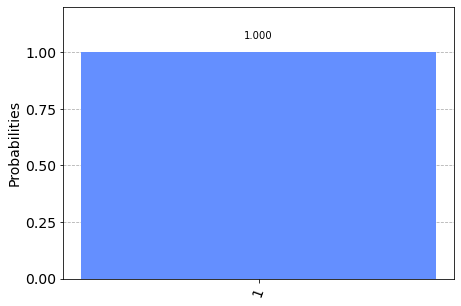

In [8]:
#instead of the statevector we will get the counts for the 0 and 1 results using .get_counts():
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

#### Qubit in a superposition:

|q0⟩= 1/√2|0⟩ + i/√2 |1⟩

In [9]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>


In [10]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc) # # Create a Qobj from the circuit for the simulator to run
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)  

[0.70710678+0.j         0.        +0.70710678j]


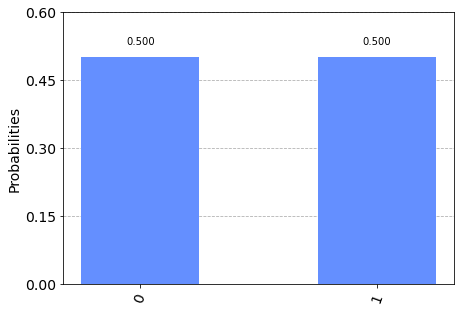

In [11]:
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

## Measurement 

Probability of measuring a state  
|ψ ⟩  in the state  |x⟩:

p(|x⟩) =|⟨x|ψ⟩|^2

[0.70710678+0.j         0.        +0.70710678j]


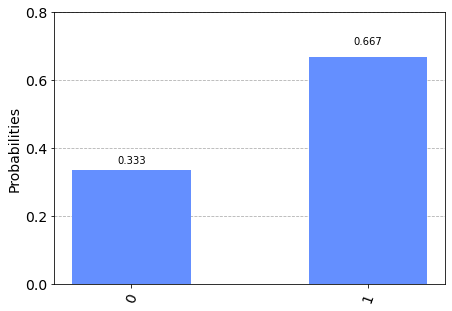

In [12]:
#State with 1/3 probability of measuring |0> and 2/3 of measuring |1>
initial_state2 = [1/sqrt(3), sqrt(2)/sqrt(3)]  # Define state |q_0>
qc2 = QuantumCircuit(1) # Must redefine qc
qc2.initialize(initial_state2, 0) # Initialize the 0th qubit in the state `initial_state`
qc2.save_statevector() # Save statevector
qobj2 = assemble(qc2) # # Create a Qobj from the circuit for the simulator to run
state2 = sim.run(qobj2).result().get_statevector() # Execute the circuit
print(state)  
results2 = sim.run(qobj2).result().get_counts()
plot_histogram(results2)

## The Bloch Sphere

We can describe the state of any qubit using the two variables   ϕ and  θ:

$$|q⟩ = \cos\frac{\theta}{2} |0⟩ + e^{i\phi} \sin\frac{\theta}{2}|1⟩$$

where θ,ϕ ∈ R
 


If we interpret  θ  and   ϕ as spherical co-ordinates (r=1, since the magnitude of the qubit state is  1), we can plot any single qubit state on the surface of a sphere, known as the Bloch sphere.

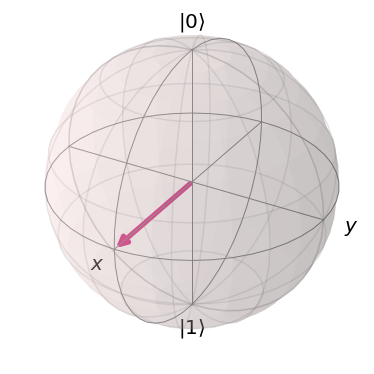

In [13]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

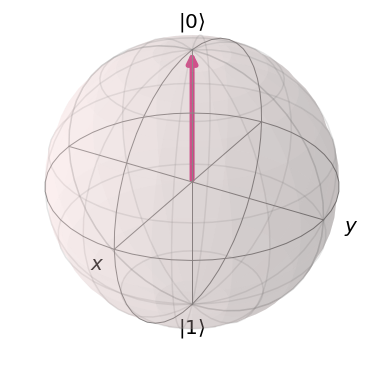

In [14]:
#Plotting \0>
coords = [0,1,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords)

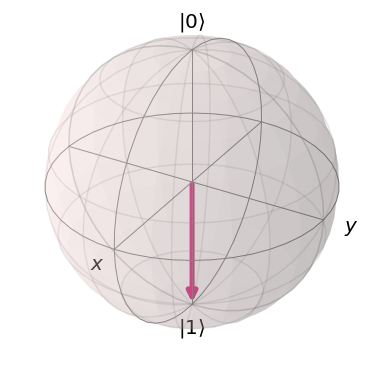

In [15]:
#Plotting \1>
coords = [pi,1,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords)

In [16]:
from qiskit_textbook.widgets import bloch_calc
bloch_calc()

HTML(value='<pre></pre>')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01h\x00\x00\x01h\x08\x06\x00\x00\x00z\xe5a\xd5\x00\…